In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from math import sqrt, pi
import random
import numpy as np

In [2]:
points = np.loadtxt('C:\day2\wellpoints.txt')
points.shape

(12, 4)

Text(0, 0.5, 'Ошибка')

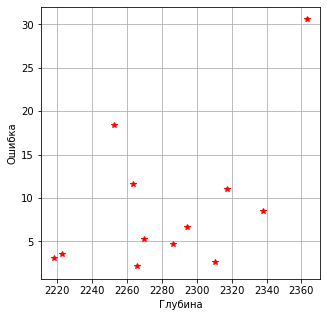

In [3]:
plt.figure(figsize=(5,5))
plt.plot(points[:,2], points[:,3], '*r')
plt.grid()
plt.xlabel('Глубина')
plt.ylabel('Ошибка')

In [4]:
from scipy import stats

x = points[:,2] # значения глубины
y = points[:,3] # значения ошибки валидации

slope, intercept, rvalue = stats.linregress(x, y)[0:3] # подбор регрессии

y_est = intercept + slope*x # прогноз по значениям х


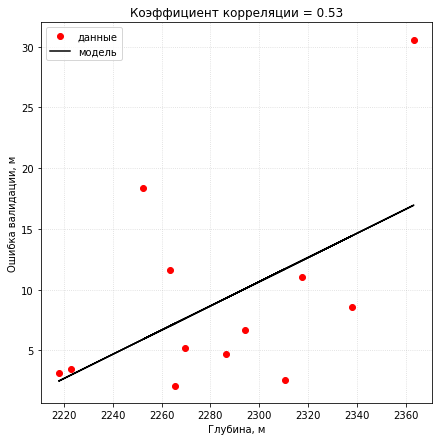

In [5]:
plt.figure(figsize=(7,7))
plt.plot(x, y, 'or', label='данные')
plt.plot(x, y_est, 'k', label='модель')
plt.title('Коэффициент корреляции = %.2f' % rvalue)
plt.xlabel('Глубина, м')
plt.ylabel('Ошибка валидации, м')
plt.grid(ls=':',alpha=.5)
plt.legend()
plt.show()

In [6]:
np.argwhere(y==y.max()) # функция позволяет определить позицию в массиве, соответсвующую заданному условию

array([[4]], dtype=int64)

In [7]:
#y[4], x[4]

In [8]:
'''
функция filter позволяет фильтровать массив по заданной функции.

lambda - однострочная функция
'''

x_n = list(filter(lambda t : t != x[4], x))
y_n = list(filter(lambda x : x != y[4], y))

In [9]:
slope, intercept, rvalue = stats.linregress(x_n, y_n)[0:3] # подбор регрессии

y_est = intercept + slope*x # прогноз по значениям х

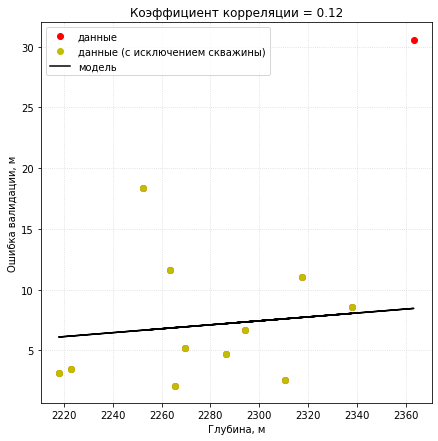

In [10]:
plt.figure(figsize=(7,7))
plt.plot(x, y, 'or', label='данные')
plt.plot(x_n, y_n, 'oy', label='данные (с исключением скважины)')
plt.plot(x, y_est, 'k', label='модель')
plt.title('Коэффициент корреляции = %.2f' % rvalue)
plt.xlabel('Глубина, м')
plt.ylabel('Ошибка валидации, м')
plt.grid(ls=':',alpha=.5)
plt.legend()
plt.show()

In [11]:
#Проведите исследование по устойчивости линейной регрессии - выполните последовательное исключение скважин с оценкой Ккор.

#Подумайте, как визуализировать результаты анализа;
#Какой критерий мог бы использоваться для заключения об устойчивости регрессии?

#Результат:

#В рамках блокнота создайте функцию, которая берет на вход набор точек [X1, X2]. 
#В рамках функции выполняется поочередное исключение точек с оценкой коэффициента корреляции.
#На выходе функции - набор коэффициентов корреляции при исключении каждой скважины.
#Подберите наглядный способ визуализации для принятия решения об устойчивости/неустойчивости регрессии

Text(0.5, 0, 'cov')

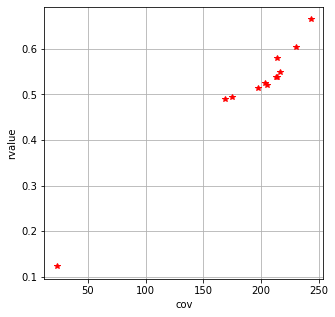

In [20]:
plt.figure(figsize=(5,5))
plt.plot(cov, rvalue, '*r')
plt.grid()
plt.ylabel('rvalue')
plt.xlabel('cov')

In [16]:
def validate(x1,x2):
    rvalue = np.zeros(len(x1))
    cov = np.zeros(len(x1))
    for i in range(len(x1)):
        x_i = list(filter(lambda t : t != x1[i], x1))
        y_i = list(filter(lambda b : b != x2[i], x2))
        rvalue[i] = stats.linregress(x_i, y_i)[2] # подбор регрессии
        cov[i] = np.cov(x_i, y_i)[0][1]
    return [rvalue, cov]

In [17]:
rvalue, cov = validate(x,y)

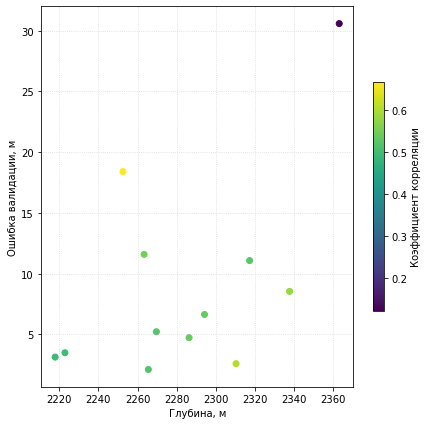

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(x=x,y=y,c=rvalue)
plt.xlabel('Глубина, м')
plt.ylabel('Ошибка валидации, м')
plt.grid(ls=':',alpha=.5)

plt.colorbar(shrink=0.6, label='Коэффициент корреляции')
plt.show()